In [11]:
# I exported the Weekly dataset from R Using write.csv(Weekly, "C:/Users/cichr/Documents/ISLR work/Weekly.csv")
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
converters = {'a': int, 'b': int, 'c': int}
Weekly = pd.read_csv('Weekly.csv', converters=converters)
Weekly.shape

(1089, 9)

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [13]:
Weekly['Direction2'] = Weekly.Direction.factorize()[0]
Weekly.head(20)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
0,1990,0.82,1.57,-3.94,-0.23,-3.48,0.15,-0.27,Down,0
1,1990,-0.27,0.82,1.57,-3.94,-0.23,0.15,-2.58,Down,0
2,1990,-2.58,-0.27,0.82,1.57,-3.94,0.16,3.51,Up,1
3,1990,3.51,-2.58,-0.27,0.82,1.57,0.16,0.71,Up,1
4,1990,0.71,3.51,-2.58,-0.27,0.82,0.15,1.18,Up,1
5,1990,1.18,0.71,3.51,-2.58,-0.27,0.15,-1.37,Down,0
6,1990,-1.37,1.18,0.71,3.51,-2.58,0.15,0.81,Up,1
7,1990,0.81,-1.37,1.18,0.71,3.51,0.13,0.04,Up,1
8,1990,0.04,0.81,-1.37,1.18,0.71,0.14,1.25,Up,1
9,1990,1.25,0.04,0.81,-1.37,1.18,0.13,-2.68,Down,0


In [21]:
Weekly.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
count,"1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00",1089,"1,089.00"
unique,nan,nan,nan,nan,nan,nan,nan,nan,2,nan
top,nan,nan,nan,nan,nan,nan,nan,nan,Up,nan
freq,nan,nan,nan,nan,nan,nan,nan,nan,605,nan
mean,"2,000.05",0.15,0.15,0.15,0.15,0.14,1.57,0.15,NaN,0.56
std,6.03,2.36,2.36,2.36,2.36,2.36,1.69,2.36,NaN,0.50
min,"1,990.00",-18.20,-18.20,-18.20,-18.20,-18.20,0.09,-18.20,NaN,0.00
25%,"1,995.00",-1.15,-1.15,-1.16,-1.16,-1.17,0.33,-1.15,NaN,0.00
50%,"2,000.00",0.24,0.24,0.24,0.24,0.23,1.00,0.24,NaN,1.00
75%,"2,005.00",1.41,1.41,1.41,1.41,1.41,2.05,1.41,NaN,1.00


In [23]:
Weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction2
Year,1.00,-0.03,-0.03,-0.03,-0.03,-0.03,0.84,-0.03,-0.02
Lag1,-0.03,1.00,-0.07,0.06,-0.07,-0.01,-0.06,-0.08,-0.05
Lag2,-0.03,-0.07,1.00,-0.08,0.06,-0.07,-0.09,0.06,0.07
Lag3,-0.03,0.06,-0.08,1.00,-0.08,0.06,-0.07,-0.07,-0.02
Lag4,-0.03,-0.07,0.06,-0.08,1.00,-0.08,-0.06,-0.01,-0.02
Lag5,-0.03,-0.01,-0.07,0.06,-0.08,1.00,-0.06,0.01,-0.02
Volume,0.84,-0.06,-0.09,-0.07,-0.06,-0.06,1.00,-0.03,-0.02
Today,-0.03,-0.08,0.06,-0.07,-0.01,0.01,-0.03,1.00,0.72
Direction2,-0.02,-0.05,0.07,-0.02,-0.02,-0.02,-0.02,0.72,1.00


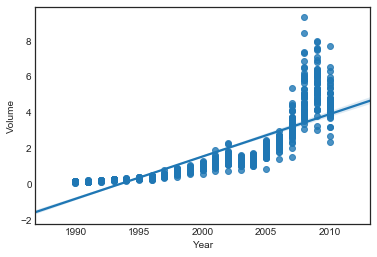

In [28]:
sns.regplot(Weekly.Year, Weekly.Volume)

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


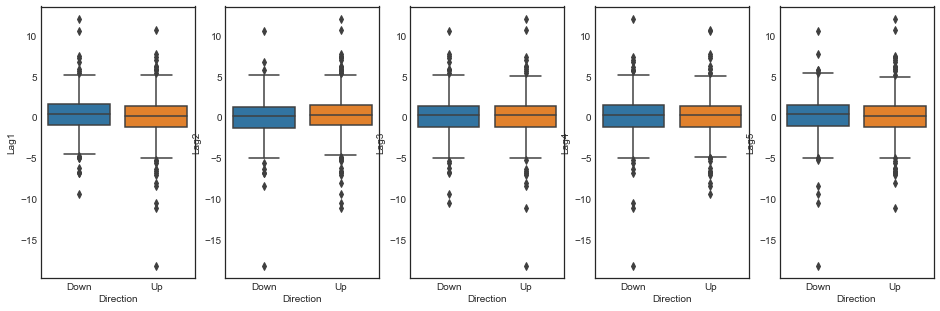

In [39]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot2grid((1, 5), (0, 0))
ax2 = plt.subplot2grid((1, 5), (0, 1))
ax3 = plt.subplot2grid((1, 5), (0, 2))
ax4 = plt.subplot2grid((1, 5), (0, 3))
ax5 = plt.subplot2grid((1, 5), (0, 4))
sns.boxplot(x="Direction", y="Lag1", data=Weekly, ax=ax1)
sns.boxplot(x="Direction", y="Lag2", data=Weekly, ax=ax2)
sns.boxplot(x="Direction", y="Lag3", data=Weekly, ax=ax3)
sns.boxplot(x="Direction", y="Lag4", data=Weekly, ax=ax4)
sns.boxplot(x="Direction", y="Lag5", data=Weekly, ax=ax5)